# MOVIE LENS CASE STUDY

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
movies_data = pd.read_csv('movies.dat' , sep = '::' , header = None , names = ['MovieID','Title','Genres'],
                         dtype = {'MovieID' : np.int32, 'Title' : np.str, 'Genres' : np.str},
                         encoding = 'latin-1' , engine = 'python')

user_data = pd.read_csv('users.dat' , sep = '::' , header = None , names = ['UserID','Gender','Age','Occupation','ZipCode'],
                         dtype = {'UserID' : np.int32, 'Gender' : np.str, 'Age' : np.int32, 'Occupation' : np.int32, 'ZipCode' : np.str},
                         encoding = 'utf-8' , engine = 'python')

ratings_data = pd.read_csv('ratings.dat', sep = '::', header = None, names = ['UserID','MovieID','Rating','Timestamp'],
                          dtype = {'UserID' : np.int32, 'MovieID' : np.int32, 'Rating' : np.int32, 'Timestamp' : np.str},
                          encoding = 'utf-8' , engine = 'python')

ratings_data

C:\Users\sanch\AppData\Local\Temp\ipykernel_16732\2196202179.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = {'MovieID' : np.int32, 'Title' : np.str, 'Genres' : np.str},
C:\Users\sanch\AppData\Local\Temp\ipykernel_16732\2196202179.py:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = {'UserID' : np.int32, 'Gender' : np.str, 'Age' : np.int

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [3]:
movies_data.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
user_data.head()

,UserID,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings_data.head(10)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


### CREATING A MASTER DATA SET

In [6]:
# MERGING THE DATAFRAMES BY TAKING USERID AS THE PRIMARY KEY

master_data = pd.merge(ratings_data , user_data , how = 'outer' , on = ['UserID'])

#DROPPING THE COLUMNS WHICH ARE NOT REQUIRED

master_data = master_data.drop(['ZipCode' , 'Timestamp'] , axis = 1)



master_data = pd.merge(movies_data , master_data , how = 'outer' , on = ['MovieID'])

master_data = master_data.drop(['Genres'] , axis = 1)

master_data

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1.0,5.0,F,1.0,10.0
1,1,Toy Story (1995),6.0,4.0,F,50.0,9.0
2,1,Toy Story (1995),8.0,4.0,M,25.0,12.0
3,1,Toy Story (1995),9.0,5.0,M,25.0,17.0
4,1,Toy Story (1995),10.0,5.0,F,35.0,1.0
...,...,...,...,...,...,...,...
1000381,3952,"Contender, The (2000)",5812.0,4.0,F,25.0,7.0
1000382,3952,"Contender, The (2000)",5831.0,3.0,M,25.0,1.0
1000383,3952,"Contender, The (2000)",5837.0,4.0,M,25.0,7.0
1000384,3952,"Contender, The (2000)",5927.0,1.0,M,35.0,14.0


### USER AGE DISTRIBUTION

In [7]:
master_data['Age'].value_counts()

25.0    395556
35.0    199003
18.0    183536
45.0     83633
50.0     72490
56.0     38780
1.0      27211
Name: Age, dtype: int64

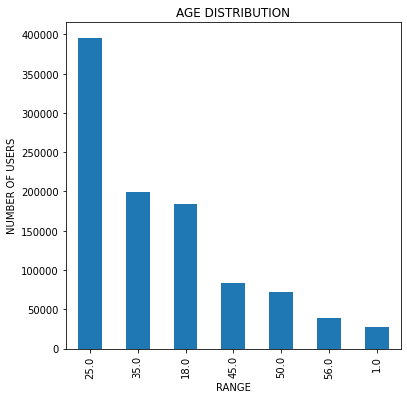

In [8]:
(master_data['Age'].value_counts()).plot(kind = 'bar' , title = 'AGE DISTRIBUTION', figsize = (6,6))
plt.xlabel('RANGE')
plt.ylabel('NUMBER OF USERS')
plt.show()


### USER RATING OF THE MOVIE 'TOY STORY'

In [9]:
toy_story_df = master_data.groupby('Title')
toy_story_df = toy_story_df.get_group('Toy Story (1995)')

toy_story_df

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1.0,5.0,F,1.0,10.0
1,1,Toy Story (1995),6.0,4.0,F,50.0,9.0
2,1,Toy Story (1995),8.0,4.0,M,25.0,12.0
3,1,Toy Story (1995),9.0,5.0,M,25.0,17.0
4,1,Toy Story (1995),10.0,5.0,F,35.0,1.0
...,...,...,...,...,...,...,...
2072,1,Toy Story (1995),6022.0,5.0,M,25.0,17.0
2073,1,Toy Story (1995),6025.0,5.0,F,25.0,1.0
2074,1,Toy Story (1995),6032.0,4.0,M,45.0,7.0
2075,1,Toy Story (1995),6035.0,4.0,F,25.0,1.0


In [10]:
rating = toy_story_df['Rating'].value_counts()

<AxesSubplot:title={'center':'TOY STORY (1995)'}, ylabel='Rating'>

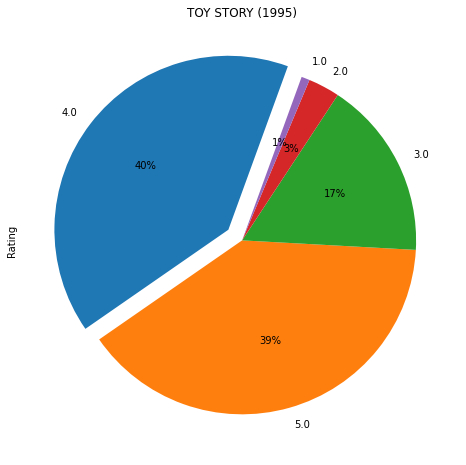

In [11]:
rating.plot(kind = 'pie' , explode = (0.1,0,0,0,0) , title = 'TOY STORY (1995)',
            figsize = (8,8) , startangle = 70 , autopct='%1.0f%%')

### TOP 25 MOVIES BY VIEWERSHIP RATING

In [12]:
top25_movies = master_data.sort_values('Rating' , ascending = False)

top25_movies.drop_duplicates(subset = 'MovieID').head(25).set_index('MovieID')

,Title,UserID,Rating,Gender,Age,Occupation
MovieID,,,,,,
1,Toy Story (1995),1.0,5.0,F,1.0,10.0
2409,Rocky II (1979),101.0,5.0,F,18.0,3.0
1012,Old Yeller (1957),447.0,5.0,F,45.0,11.0
1010,"Love Bug, The (1969)",4979.0,5.0,M,35.0,2.0
2408,Cocoon: The Return (1988),5021.0,5.0,M,50.0,6.0
2407,Cocoon (1985),5995.0,5.0,F,35.0,1.0
1011,Herbie Rides Again (1974),651.0,5.0,M,35.0,7.0
2410,Rocky III (1982),169.0,5.0,M,25.0,7.0
2413,Clue (1985),5305.0,5.0,F,18.0,4.0


### MOVIES REVIEWED BY USERID = 2696

In [13]:
df = master_data.groupby('UserID')

user_2696 = df.get_group(2696)

user_2696[['Title' , 'Rating']].reset_index(drop = True)



,Title,Rating
0,"Client, The (1994)",3.0
1,Lone Star (1996),5.0
2,Basic Instinct (1992),4.0
3,E.T. the Extra-Terrestrial (1982),3.0
4,"Shining, The (1980)",4.0
5,Back to the Future (1985),2.0
6,Cop Land (1997),3.0
7,L.A. Confidential (1997),4.0
8,"Game, The (1997)",4.0
9,I Know What You Did Last Summer (1997),2.0


### UNIQUE GENRES

In [24]:
genres = movies_data['Genres'].str.split('|')
genres


0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: Genres, Length: 3883, dtype: object

In [25]:
list_genres = set()

for i in genres :
    list_genres = list_genres.union(set(i))

In [27]:
for i in genres :
    print(i)

['Animation', "Children's", 'Comedy']
['Adventure', "Children's", 'Fantasy']
['Comedy', 'Romance']
['Comedy', 'Drama']
['Comedy']
['Action', 'Crime', 'Thriller']
['Comedy', 'Romance']
['Adventure', "Children's"]
['Action']
['Action', 'Adventure', 'Thriller']
['Comedy', 'Drama', 'Romance']
['Comedy', 'Horror']
['Animation', "Children's"]
['Drama']
['Action', 'Adventure', 'Romance']
['Drama', 'Thriller']
['Drama', 'Romance']
['Thriller']
['Comedy']
['Action']
['Action', 'Comedy', 'Drama']
['Crime', 'Drama', 'Thriller']
['Thriller']
['Drama', 'Sci-Fi']
['Drama', 'Romance']
['Drama']
['Drama']
['Romance']
['Adventure', 'Sci-Fi']
['Drama']
['Drama']
['Drama', 'Sci-Fi']
['Adventure', 'Romance']
["Children's", 'Comedy', 'Drama']
['Drama', 'Romance']
['Drama']
['Documentary']
['Comedy']
['Comedy', 'Romance']
['Drama']
['Drama', 'War']
['Action', 'Crime', 'Drama']
['Drama']
['Action', 'Adventure']
['Comedy', 'Drama']
['Drama', 'Romance']
['Crime', 'Thriller']
['Animation', "Children's", 'Musica

In [26]:
print('UNIQUE GENRES ARE :') ; list_genres

UNIQUE GENRES ARE :


{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### GENERATING DUMMY VALUES FOR EACH UNIQUE GENRE

In [17]:
one_hot = movies_data['Genres'].str.get_dummies('|')
one_hot

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### CREATING A SEPARATE COLUMN FOR EACH GENRE CATEGORY

In [18]:
sep_col_df = pd.concat([movies_data , one_hot] , axis = 1)
sep_col_df

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
